<a href="https://colab.research.google.com/github/Jaskirat1/RNN/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
y_train.shape

(60000,)

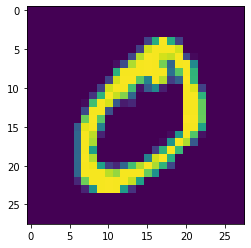

In [11]:
plt.imshow(X_train[1])


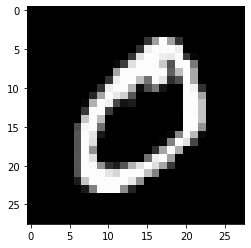

In [12]:
plt.imshow(X_train[1], cmap= 'gray')

In [14]:
y_train[1]

0

Encoding

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Scaling

In [19]:
X_train = X_train/255
X_test = X_test/255 

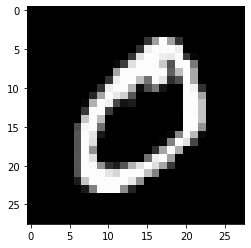

In [20]:
plt.imshow(X_train[1], cmap='gray')

Reshaping

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [23]:
X_train.shape

(60000, 28, 28, 1)

In [24]:
X_test = X_test.reshape(10000, 28, 28, 1)

Training

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten

In [27]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(4,4), input_shape=(28,28,1), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(patience=1)


In [31]:
early_stop

In [32]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test))

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1350 - accuracy: 0.9597 - val_loss: 0.0539 - val_accuracy: 0.9829
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0390 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.0334 - val_accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0421 - val_accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0462 - val_accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0419 - val_accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.0433 -

Performance

In [33]:
import pandas as pd


In [34]:
loss_df = pd.DataFrame(model.history.history)

In [35]:
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.135021,0.959717,0.053890,0.9829
1,0.046246,0.985950,0.038998,0.9862
2,0.030742,0.990517,0.033360,0.9887
3,0.021131,0.993467,0.042126,0.9856
4,0.013848,0.995650,0.046187,0.9859


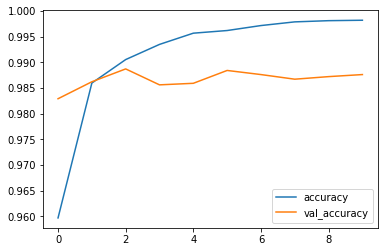

In [36]:
loss_df[['accuracy', 'val_accuracy']].plot()

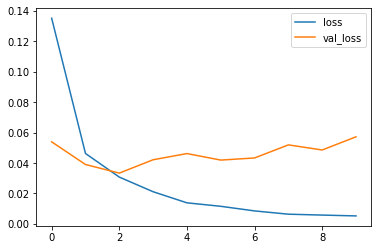

In [37]:
loss_df[['loss', 'val_loss']].plot()

Testing

In [38]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [39]:
predictions.shape

(10000, 10)

In [40]:
predictions = np.argmax(predictions, axis =1)

In [41]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [44]:
confusion_matrix(y_test, predictions)

array([[ 976,    1,    1,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1127,    1,    2,    2,    0,    2,    1,    0,    0],
       [   1,    1, 1018,    2,    2,    0,    1,    4,    2,    1],
       [   0,    0,    2, 1001,    0,    1,    0,    3,    2,    1],
       [   0,    0,    1,    0,  976,    0,    0,    0,    0,    5],
       [   3,    0,    0,   16,    0,  871,    1,    0,    0,    1],
       [   7,    2,    0,    0,    5,    1,  941,    0,    2,    0],
       [   0,    3,    9,    0,    2,    0,    0, 1008,    1,    5],
       [   2,    1,    0,    1,    1,    1,    0,    3,  963,    2],
       [   1,    1,    0,    1,    7,    0,    0,    2,    2,  995]])

In [45]:
import seaborn as sns

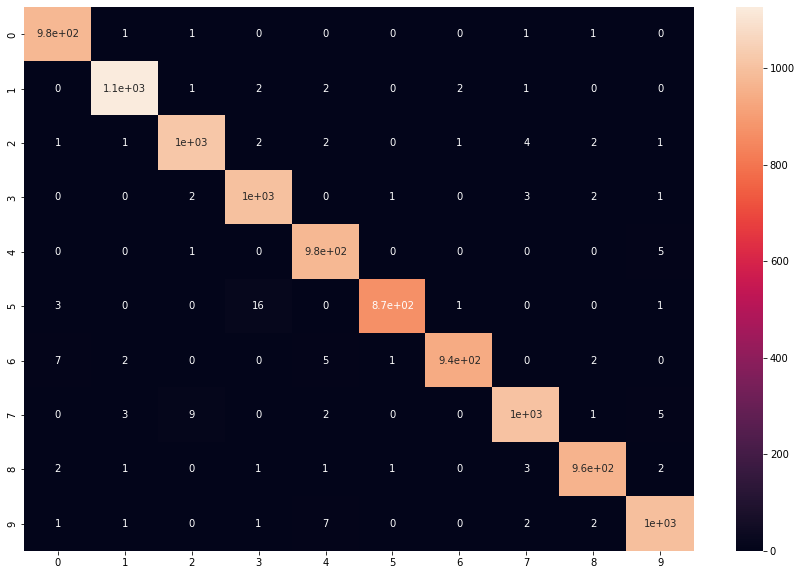

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [48]:
y_test[1]

2